In [295]:
import seaborn as sns
import pandas as pd
from IPython.display import display as dsp

df = sns.load_dataset('titanic')
dsp(df.head())
print(df.info())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


Checking for NaN values in the data set using .isna().sum() and heatmap

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

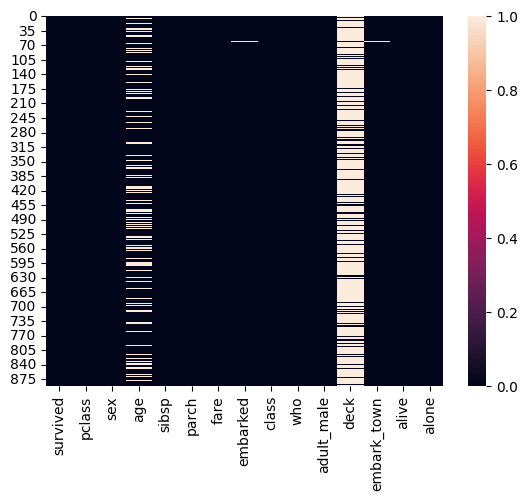

In [296]:
dsp(df.isna().sum())
sns.heatmap(df.isna())

Removing column = deck since there are alot of missing values and it is of not much use in our data set 

In [297]:
df.drop(columns='deck', inplace=True)
dsp(df.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [298]:
df[['who','age']].head(15)

,who,age
0,man,22.0
1,woman,38.0
2,woman,26.0
3,woman,35.0
4,man,35.0
5,man,NaN
6,man,54.0
7,child,2.0
8,woman,27.0
9,child,14.0


Setting Age mean for NaN values groupedBy who column

In [299]:
mean_age = df.groupby('who')['age'].mean().astype(int)
dsp(mean_age)

#Filling the missing values in Age
df['age'] = df['age'].fillna(df['who'].map(mean_age)) #this is by using map

#by creating a function
'''
def add_missing_age(cols):
    age = cols.iloc[0]
    who = cols.iloc[1]

    if pd.isnull(age):
        if who == 'man':
            return mean_age['man']
        
        elif who == 'woman':
            return mean_age['woman']
        
        elif who == 'child':
            return mean_age['child']
    else:
        return age
    

df['age'] = df[['age','who']].apply(add_missing_age, axis=1)        
'''

dsp(df[['who','age']].head(15), df[['who','age']].dtypes)

who
child     6
man      33
woman    32
Name: age, dtype: int64

,who,age
0,man,22.0
1,woman,38.0
2,woman,26.0
3,woman,35.0
4,man,35.0
5,man,33.0
6,man,54.0
7,child,2.0
8,woman,27.0
9,child,14.0


who     object
age    float64
dtype: object

Filling missing values of Embark_town or Embarked

In [300]:
print(df[df['embarked'].isna()].index) #getting the particular index where the valuse are missing
print(df[df['embark_town'].isna()].index)

df.fillna({'embarked': df['embarked'].mode()[0], 'embark_town': df['embark_town'].mode()[0]}, inplace=True)
dsp(df[['embarked','embark_town']].head(66))


#We can also drop the NaN value rows
#df.dropna(inplace=True)

Index([61, 829], dtype='int64')
Index([61, 829], dtype='int64')


,embarked,embark_town
0,S,Southampton
1,C,Cherbourg
2,S,Southampton
3,S,Southampton
4,S,Southampton
...,...,...
61,S,Southampton
62,S,Southampton
63,S,Southampton
64,C,Cherbourg


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,32.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


<Axes: >

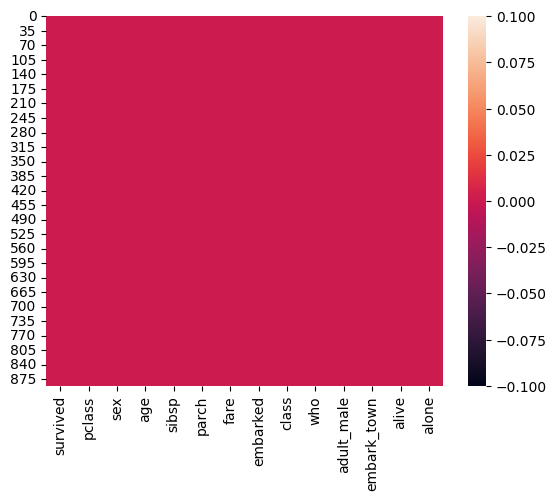

In [301]:
dsp(df)
sns.heatmap(df.isna())

Now converting text columns to numeric columns

In [302]:
#it is sharing 2 columns[female, male]
Sex = pd.get_dummies(df['sex']).astype(int)

#to get only 1 column
Sex = pd.get_dummies(df['sex'], drop_first=True).astype(int).rename(columns={Sex.columns[0]: 'Sex(male)'})
Class = pd.get_dummies(df['class'], prefix='Class').astype(int)
Embarked = pd.get_dummies(df['embarked'], prefix='Town').astype(int)
Seniority = pd.get_dummies(df['who']).astype(int)
Alone = pd.get_dummies(df['alone'], drop_first=True).astype(int).rename(columns={True: 'Alone'})

dsp(Alone.head(),
Seniority.head(),
Embarked.head(),
Class.head(),
Sex.head())

,Alone
0,0
1,0
2,1
3,0
4,1


,child,man,woman
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0


,Town_C,Town_Q,Town_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


,Class_First,Class_Second,Class_Third
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


,male
0,1
1,0
2,0
3,0
4,1


Now dropping those text columns which we converted to Numeric

In [303]:
df.drop(columns=['sex', 'class', 'embarked', 'who', 'alive', 'alone', 'embark_town', 'adult_male', 'alive'], inplace=True)
df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


Now merging the newly created Numeric colums to main data set

In [304]:
df = pd.concat([df,Sex,Seniority,Class,Embarked,Alone], axis=1)
dsp(df.head())

,survived,pclass,age,sibsp,parch,fare,male,child,man,woman,Class_First,Class_Second,Class_Third,Town_C,Town_Q,Town_S,Alone
0,0,3,22.0,1,0,7.2500,1,0,1,0,0,0,1,0,0,1,0
1,1,1,38.0,1,0,71.2833,0,0,0,1,1,0,0,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1,0,0,1,0,0,1,1
3,1,1,35.0,1,0,53.1000,0,0,0,1,1,0,0,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,0,0,1,0,0,1,1


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      891 non-null    int64  
 1   pclass        891 non-null    int64  
 2   age           891 non-null    float64
 3   sibsp         891 non-null    int64  
 4   parch         891 non-null    int64  
 5   fare          891 non-null    float64
 6   male          891 non-null    int64  
 7   child         891 non-null    int64  
 8   man           891 non-null    int64  
 9   woman         891 non-null    int64  
 10  Class_First   891 non-null    int64  
 11  Class_Second  891 non-null    int64  
 12  Class_Third   891 non-null    int64  
 13  Town_C        891 non-null    int64  
 14  Town_Q        891 non-null    int64  
 15  Town_S        891 non-null    int64  
 16  Alone         891 non-null    int64  
dtypes: float64(2), int64(15)
memory usage: 118.5 KB


<Axes: xlabel='child', ylabel='age'>

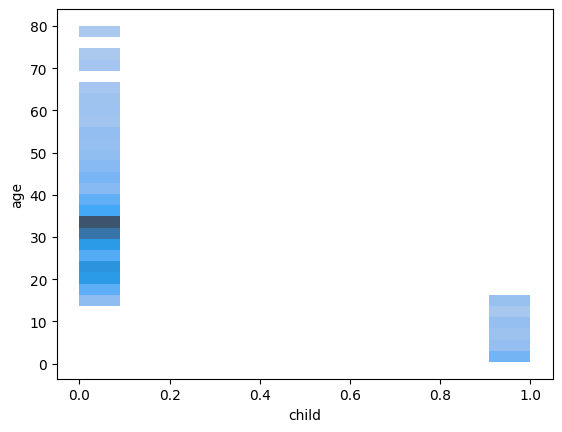

In [307]:
sns.histplot(data=df, y='age', x='child')

<Axes: xlabel='Class_Second', ylabel='age'>

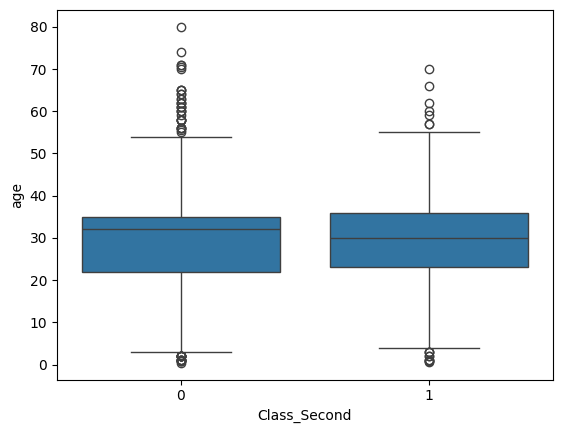

In [308]:
sns.boxplot(data=df, x='Class_Second', y='age')